In [1]:
import sys
import os
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.model_selection import train_test_split
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sys.path.append("D:\Study\Python\Sleep-Analysis-with-accelerometer")

import prepare_data

In [3]:
data_path = os.path.join("D:\Study\Python\Sleep-Analysis-with-accelerometer", "statistic_features", "stat_features_60s.csv")
patient_list = ['002','003','005','007','08a','08b','09a','09b', '10a','011','013','014','15a','15b','016',
            '017','018','019','020','021','022','023','025','026','027','028','029','030','031','032',
            '033','034','035','036','037','038','040','042','043','044','045','047','048','049','051']
statistics_list=["std_x", "std_y", "std_z"]

## 1. Logistic regression

32 windows, std, windows lenght = 60 sec

In [4]:
X_train, y_train = prepare_data.load_stat_features_others_windows(patient_list, 
                                                        data_path=data_path,
                                                        n_others_windows=32,
                                                        statistics_list=statistics_list)
print(X_train.shape)
print(y_train.shape)

(21765, 99)
(21765,)


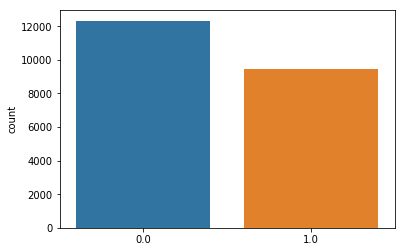

In [5]:
sns.countplot(y_train)

In [6]:
%%time
log_reg1 = LogisticRegression()
log_reg1.fit(X_train, y_train)

Wall time: 1.17 s


In [7]:
y_predict = log_reg1.predict(X_train)

print("\nTrain set result: ")
print(metrics.classification_report(y_train, y_predict))
print("Confussion matrix: \n", metrics.confusion_matrix(y_train, y_predict))

accuracy = metrics.accuracy_score(y_train, y_predict)
print("\nAccuracy on train set: ", accuracy)


Train set result: 
             precision    recall  f1-score   support

        0.0       0.74      0.90      0.81     12329
        1.0       0.82      0.58      0.68      9436

avg / total       0.77      0.76      0.75     21765

Confussion matrix: 
 [[11107  1222]
 [ 4001  5435]]

Accuracy on train set:  0.760027567195038


#### Save model log_reg1

In [8]:
pickle.dump(log_reg1, open("log_reg1.sav", 'wb'))

In [9]:
loaded_model = pickle.load(open("log_reg1.sav", 'rb'))
accuracy = loaded_model.score(X_train, y_train)
print(accuracy)

0.760027567195038


#### test sleep_awake_detector

In [10]:
from sleep_awake_detector import Detector

In [11]:
primary_data_path = "D:\Study\Python\Sleep-Analysis-with-accelerometer\ICHI14_dataset\data"

In [12]:
model = Detector()

In [13]:
X, y = prepare_data.get_data_for_model(primary_data_path, ["033"], divide_by_win=False )

In [14]:
print(X.shape)
print(y.shape)

(3390334, 3)
(3390334,)


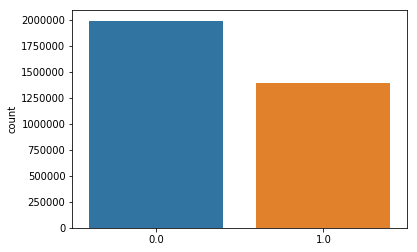

In [15]:
sns.countplot(y)

(0, 1.1)

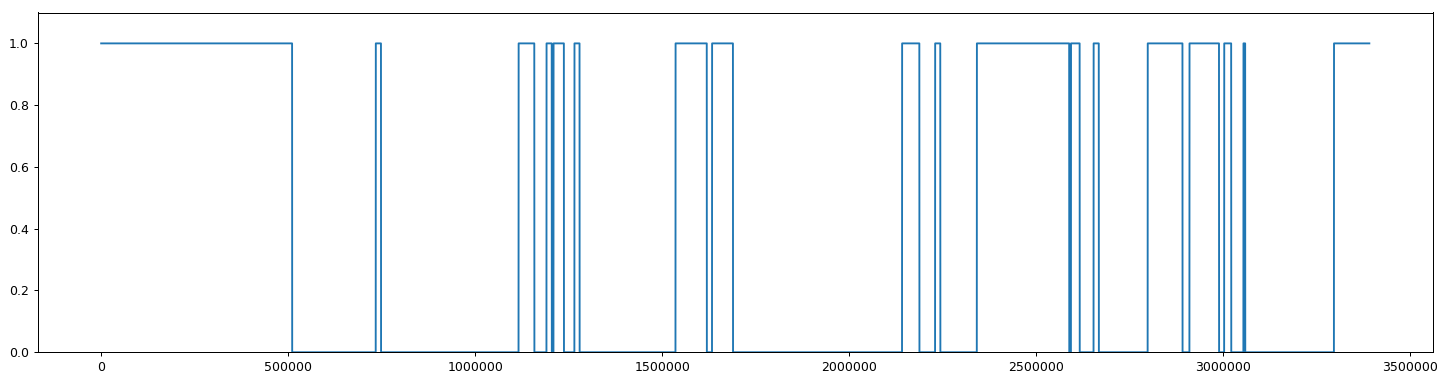

In [16]:
plt.rc('figure', figsize=(20, 5), dpi=90, facecolor='w', edgecolor='k')

ax1 = plt.subplot()
ax1.plot(y)
ax1.set_ylim([0, 1.1])

In [17]:
X, y = prepare_data.get_data_for_model(primary_data_path, ["033"], divide_by_win=False)

In [18]:
X, y = model.divide_by_windows_std(X, y, window_len=60)
X, y = model.combine_windows(X, y, n_others_windows=32)

In [19]:
print(X.shape)
print(y.shape)

(533, 99)
(533,)


In [20]:
y_predict = model.predict(X)

print("\nTrain set result: ")
print(metrics.classification_report(y, y_predict))
print("Confussion matrix: \n", metrics.confusion_matrix(y, y_predict))

accuracy = metrics.accuracy_score(y, y_predict)
print("\nAccuracy on train set: ", accuracy)


Train set result: 
             precision    recall  f1-score   support

        0.0       0.77      0.92      0.84       332
        1.0       0.80      0.55      0.65       201

avg / total       0.78      0.78      0.77       533

Confussion matrix: 
 [[305  27]
 [ 91 110]]

Accuracy on train set:  0.7786116322701688


(0, 1.1)

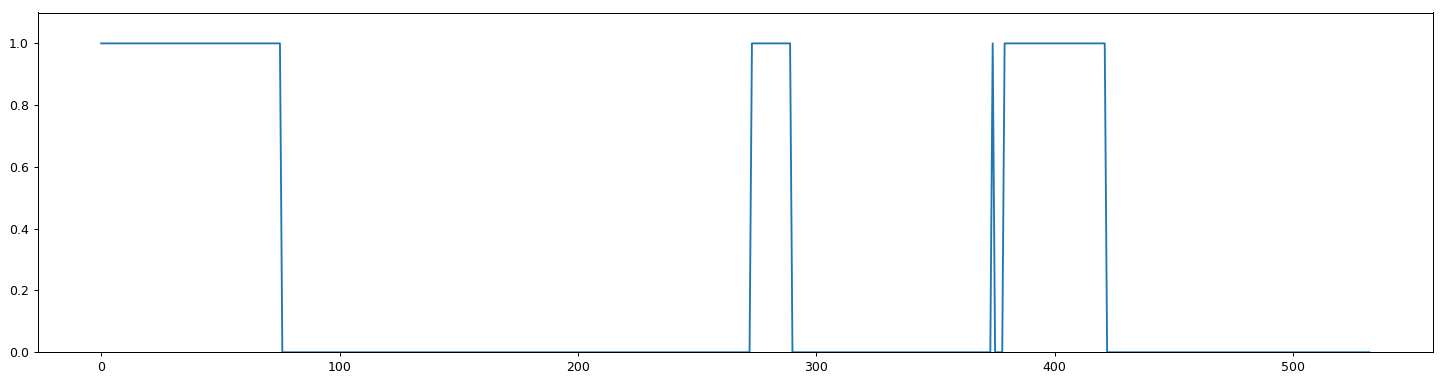

In [21]:
plt.rc('figure', figsize=(20, 5), dpi=90, facecolor='w', edgecolor='k')

ax1 = plt.subplot()
ax1.plot(y_predict)
ax1.set_ylim([0, 1.1])

(0, 1.1)

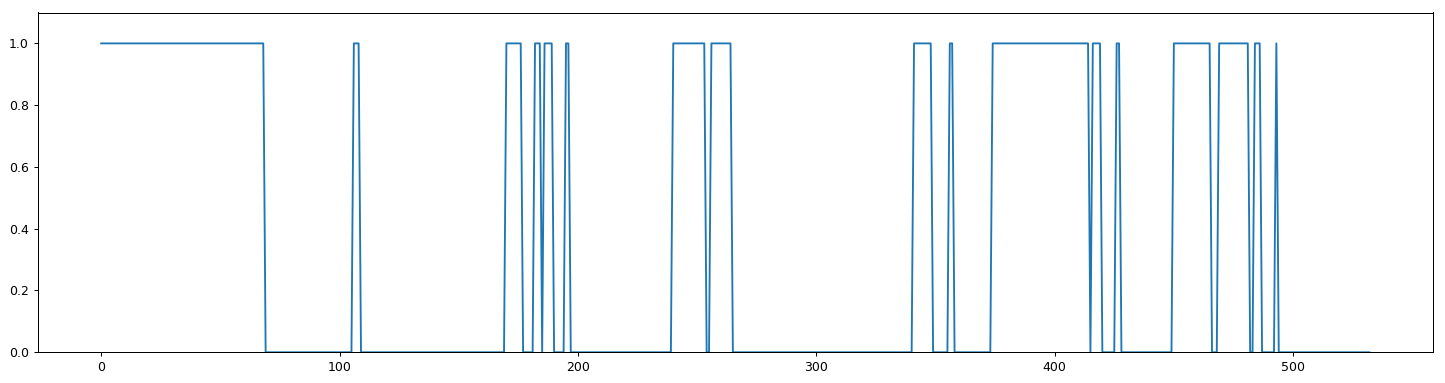

In [22]:
plt.rc('figure', figsize=(20, 5), dpi=90, facecolor='w', edgecolor='k')

ax1 = plt.subplot()
ax1.plot(y)
ax1.set_ylim([0, 1.1])